In [2]:
# 📄 main.ipynb
# CÉLULA 1: Imports

import importlib
import parametros as params
import simulacao_fisica
import simulacao_sensores
import regras_fuzzy
import logica_decisao
import visualizacao
import simulador_core as core # Importar o 'core' por último

# (Força o notebook a reler os arquivos .py na ORDEM CORRETA)
print("Atualizando módulos (reload) na ordem correta...")

# Nível 0 (Não dependem de ninguém)
importlib.reload(params)

# Nível 1 (Dependências base)
importlib.reload(simulacao_fisica)
importlib.reload(visualizacao)
importlib.reload(regras_fuzzy) # Regras primeiro

# Nível 2 (Dependem dos anteriores)
importlib.reload(simulacao_sensores) # Depende de pandas
importlib.reload(logica_decisao) # Depende de regras_fuzzy, simple_pid

# Nível 3 (O "Chefe" - depende de TODOS acima)
# Recarregar o core POR ÚLTIMO garante que ele use as
# versões novas de todas as suas dependências.
importlib.reload(core) 

print("✅ Módulos importados e atualizados! Pronto para simular.")

Atualizando módulos (reload) na ordem correta...
✅ Módulos importados e atualizados! Pronto para simular.


In [ ]:
# Cenário 1 (QUEDA)

print("==============================================")
print("🚀 INICIANDO TESTE DO CENÁRIO 1: QUEDA LOC-I")
print("==============================================")
p_cenario1 = params.get_cenario_1_queda() # 1. Pega os parâmetros da "fábrica"
core.rodar_simulacao_completa(p_cenario1) # 2. Roda a simulação com eles

In [ ]:
# Cenário 2 (POUSO)

print("==============================================")
print("🛬 INICIANDO TESTE DO CENÁRIO 2: POUSO NORMAL")
print("==============================================")
p_cenario2 = params.get_cenario_2_pouso()
core.rodar_simulacao_completa(p_cenario2)

In [ ]:
# Cenário 3 (TURBULÊNCIA)

print("==============================================")
print("💨 INICIANDO TESTE DO CENÁRIO 3: TURBULÊNCIA")
print("==============================================")
p_cenario3 = params.get_cenario_3_turbulencia()
core.rodar_simulacao_completa(p_cenario3)

🌀 INICIANDO TESTE DO CENÁRIO 4: FLAT SPIN
Iniciando simulação da física para: Cenário 4: Flat Spin (Giro Chato)...
   -> Usando velocidade inicial padrão: 0.0 m/s
Simulação da física concluída.
Visualizando [Gráfico 1]: Simulação da Física Pura...


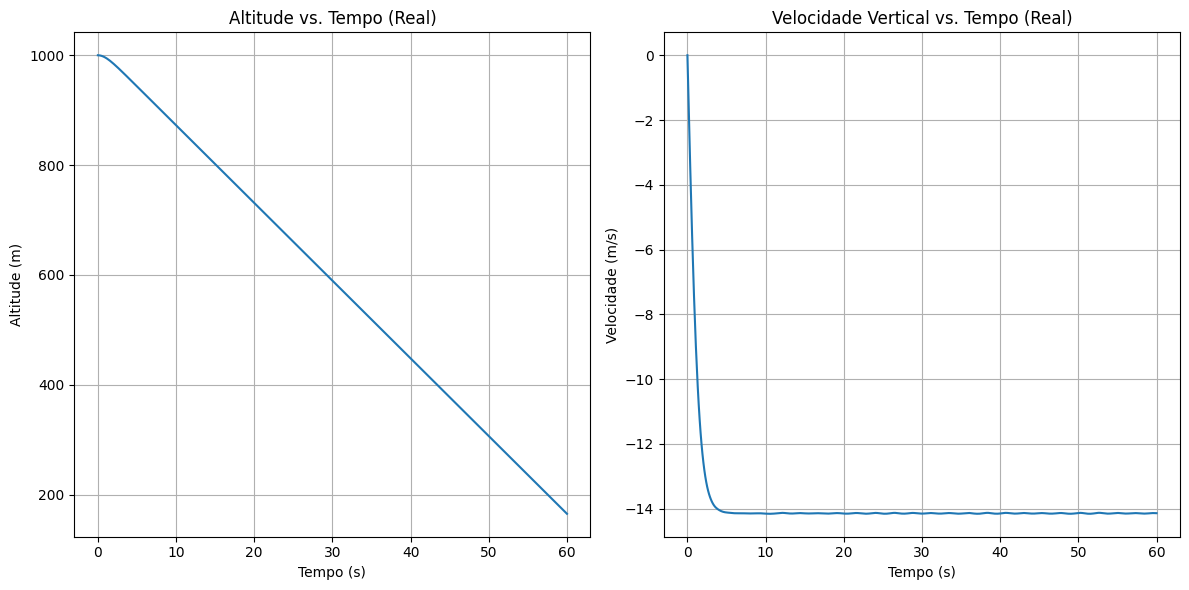

Iniciando simulação dos sensores...
Aplicando filtro de média móvel...
Simulação dos sensores concluída.
Visualizando [Gráfico 2]: Sensores (Brutos e Filtrados)...


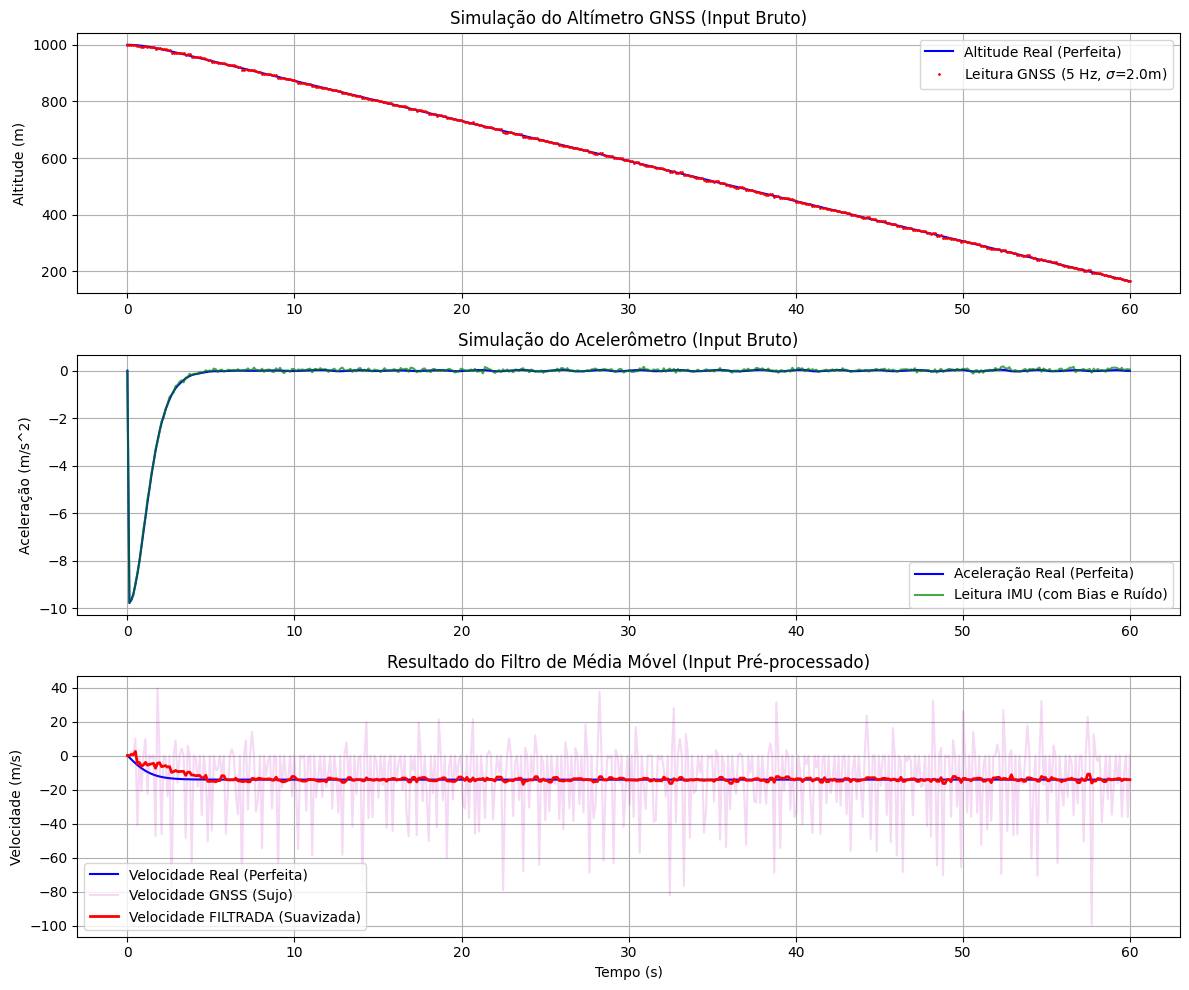

Calculando severidade (PID)...
Criando sistema de Lógica Fuzzy...
Criando variáveis Fuzzy (Fuzzificação)...
Montando o sistema de controle Fuzzy...

--- DEBUG DA 'BRIGA' FUZZY DETECTADO! ---
Instante: t=36.91s
RISCO DESPENCOU: 85.65 -> 78.56

--- ANÁLISE DOS INPUTS (O que mudou?) ---
Input 'Pitch Médio': -0.00 (Estável)
Input 'Tendência Altitude': -14.34 (Oscilando!)

--- PERTINÊNCIA (Nível de 'Verdade') ---
Pertinência 'Pitch é Neutro': 99.99%
Pertinência 'Tendência é Caindo_Rapido': 92.56%
Pertinência 'Tendência NÃO é Caindo_Rapido': 7.44%

--- FORÇA FINAL DAS REGRAS (Cabo de Guerra) ---
FORÇA 'Regra Flat Spin' (PUXA P/ ALTO): 92.56%
FORÇA 'Regra Default' (PUXA P/ BAIXO): 7.44%
------------------------------------------


--- DEBUG DA 'BRIGA' FUZZY DETECTADO! ---
Instante: t=44.49s
RISCO DESPENCOU: 85.58 -> 76.89

--- ANÁLISE DOS INPUTS (O que mudou?) ---
Input 'Pitch Médio': 0.14 (Estável)
Input 'Tendência Altitude': -14.44 (Oscilando!)

--- PERTINÊNCIA (Nível de 'Verdade') ---
Pert

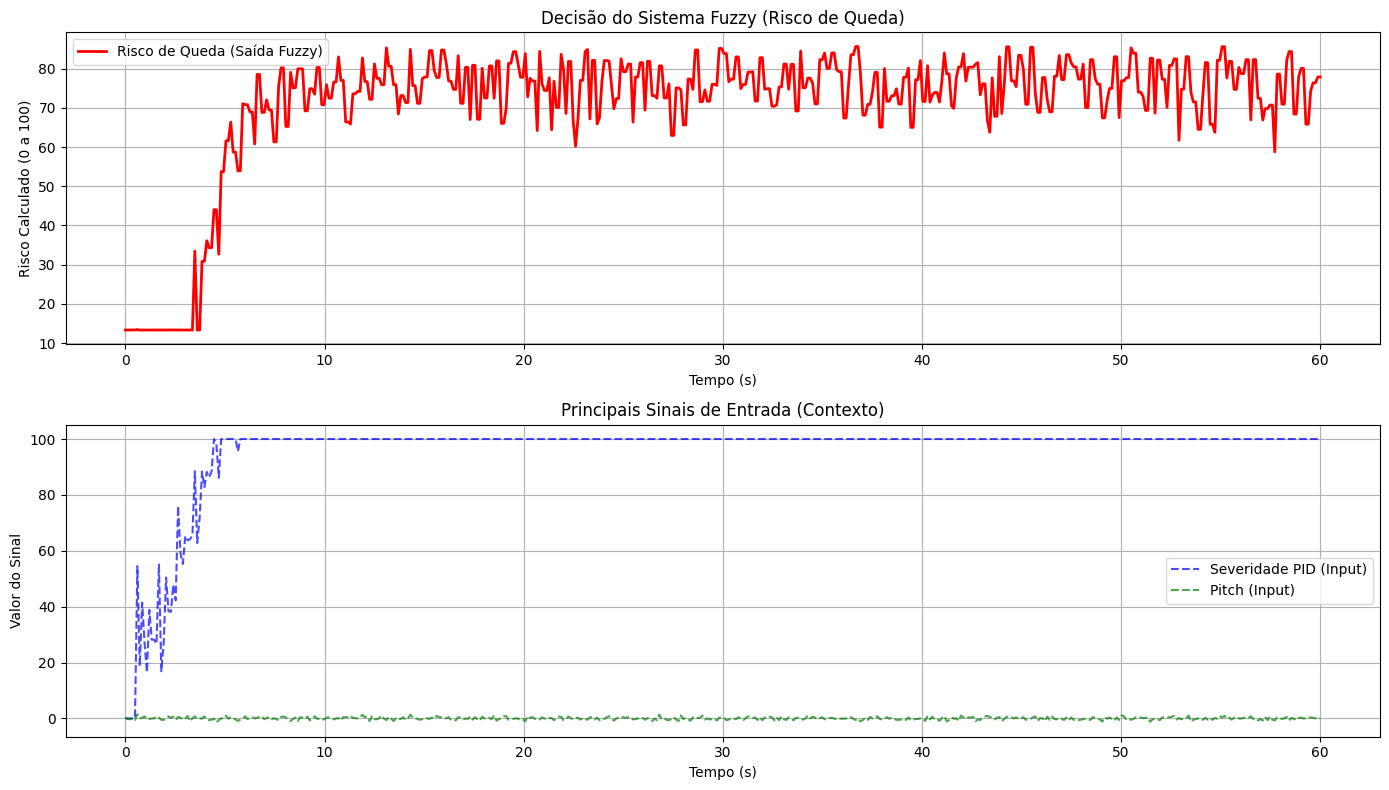


--- Análise da Tomada de Decisão (Item 3.3.2) ---

--- DEBUG DO TIMER DE DISPARO (Limiar > 85.00 por 2.0s) ---
t=13.11s: CONDIÇÃO ATIVADA (Risco 85.32 > 85.0). Timer INICIADO.
t=13.47s: CONDIÇÃO FALHOU (Risco 75.92 <= 80.0). Timer RESETADO para 0.0s!
t=29.82s: CONDIÇÃO ATIVADA (Risco 85.16 > 85.0). Timer INICIADO.
t=30.30s: CONDIÇÃO FALHOU (Risco 76.64 <= 80.0). Timer RESETADO para 0.0s!
t=36.67s: CONDIÇÃO ATIVADA (Risco 85.65 > 85.0). Timer INICIADO.
t=36.91s: CONDIÇÃO FALHOU (Risco 78.56 <= 80.0). Timer RESETADO para 0.0s!
t=44.25s: CONDIÇÃO ATIVADA (Risco 85.58 > 85.0). Timer INICIADO.
t=44.49s: CONDIÇÃO FALHOU (Risco 76.89 <= 80.0). Timer RESETADO para 0.0s!
t=45.45s: CONDIÇÃO ATIVADA (Risco 85.47 > 85.0). Timer INICIADO.
t=45.69s: CONDIÇÃO FALHOU (Risco 73.69 <= 80.0). Timer RESETADO para 0.0s!
t=50.50s: CONDIÇÃO ATIVADA (Risco 85.31 > 85.0). Timer INICIADO.
t=50.86s: CONDIÇÃO FALHOU (Risco 74.00 <= 80.0). Timer RESETADO para 0.0s!
t=55.07s: CONDIÇÃO ATIVADA (Risco 85.62 > 85.0).

| Variável (Input Fuzzy) | Valor no Instante | Análise de Pertinência (Como o 'Cérebro' Viu) |
| :--- | :--- | :--- |
| 1. Pitch Médio (Média 3s) | **0.03 graus** | **99.8% 'Neutro_Medio'** (Faixa: [-15, 0, 15]) |
| 2. Tendência Altitude (Média 5s) | **-14.00 m/s** | **97.5% 'Caindo_Rapido'** (Faixa: [-19.1, -14.1, -8.0]) |
| 3. Severidade PID | **100.00** | **100.0% 'Crítico'** (Faixa: [60, 100, 100]) |
| 4. Velocidade Vertical (Filtrada) | **-13.29 m/s** | **24.5% 'Baixa'** (Faixa: [-15, -8, 0])<br>**32.9% 'Moderada'** (Faixa: [-30, -20, -10]) |
| 5. Altitude (Bruta) | **496.18 m** | **98.7% 'Média'** (Faixa: [200, 500, 800]) |
| 6. Aceleração (Bruta) | **-0.05 m/s^2** | **98.9% 'Leve'** (Faixa: [-5, 0, 5]) |
| 7. Proximidade V-Terminal | **93.9%** | **75.7% 'Alta'** (Faixa: [0.75, 1.0, 1.0]) |
| **SAÍDA (Resultado)** | **85.65** | ****52.2% 'Alto'** (Faixa: [70, 100, 100])** |



--- CRITÉRIOS DE DISPARO (ANÁLISE TEMPORAL) ---
-> O Risco é > 85.0? Sim

--- Simulação Completa Concluída (Cenário 4: Flat Spin (Giro Chato)) ---


In [3]:
# Cenário 4 (FLAT SPIN)

print("==============================================")
print("🌀 INICIANDO TESTE DO CENÁRIO 4: FLAT SPIN")
print("==============================================")
p_cenario4 = params.get_cenario_4_flat_spin()
core.rodar_simulacao_completa(p_cenario4)

In [ ]:
# Cenário 5 (POUSO COM TURBULÊNCIA)

print("=========================================================")
print("✈️💨 INICIANDO TESTE DO CENÁRIO 5: POUSO COM TURBULÊNCIA")
print("=========================================================")
p_cenario5 = params.get_cenario_5_pouso_turbulencia()
core.rodar_simulacao_completa(p_cenario5)